In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('./AAME.csv')

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.00,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.00,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.00,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.00,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.00,3.95,3.75,3.75,3.129709,12700
...,...,...,...,...,...,...,...
10093,2020-03-26,2.29,2.29,2.08,2.28,2.280000,1600
10094,2020-03-27,2.25,2.25,2.21,2.25,2.250000,500
10095,2020-03-30,2.25,2.25,2.13,2.13,2.130000,400
10096,2020-03-31,2.11,2.11,2.11,2.11,2.110000,300


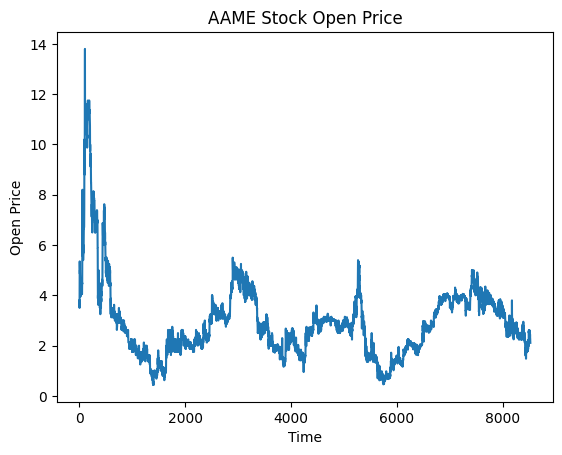

In [12]:
seq_data = data[data['Open'] != 0][['Open']].to_numpy()

plt.plot(seq_data)
plt.title('AAME Stock Open Price')  
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.show()

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(seq_data)

In [15]:
TEST_SIZE = 200
train_data = scaled_data[:-TEST_SIZE]
test_data = scaled_data[-TEST_SIZE]

In [16]:
def make_sample(data, window):
    train = []
    target = []
    for i in range(len(data) - window):
        train.append(data[i:i+window])
        target.append(data[i+window])
    return np.array(train), np.array(target)    

X_train, y_train = make_sample(train_data, 30)